<a href="https://colab.research.google.com/github/VysakhDevadas/Daily-Data-science/blob/main/Forward_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The aim of this file is to understand and implement the forward stepwise variable selection algorithm.

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets

In [29]:
# Loading Boston House Dataset 

data = datasets.load_boston()
X = pd.DataFrame(data = data.data, columns = data.feature_names)
y = data.target

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [30]:
# Taking a look
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [31]:
# Target 

y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [32]:
# Getting column names to employ forward stepwise 
cols = X.columns
cols

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [33]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size = 0.8, random_state = 42)

In [34]:
def regression_fit_predict(i):
    lr = LinearRegression(fit_intercept = False )
    lr.fit(X_train[cols[:i+1]],y_train)
    y_pred = lr.predict(X_val[cols[:i+1]])
    return mean_squared_error(y_pred,y_val)

In [35]:
def forward_select():
  mse_list = []
  for i in range(len(cols)):
    mse_list.append(regression_fit_predict(i))
  return mse_list


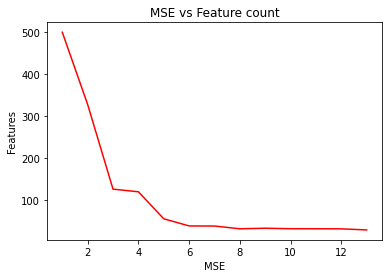

In [36]:
# Plotting number of parameters and 

mse = forward_select()
plt.plot(range(1,len(cols)+1),mse,color = 'red',label = 'MSE')
plt.xlabel('MSE')
plt.ylabel('Features')
plt.title('MSE vs Feature count')
plt.show()

In [37]:
print('Min mse  = ', min(mse))
b = mse.index(min(mse))
print('The best features to include are :')
print(cols[:b+1])

Min mse  =  29.044043350358717
The best features to include are :
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
